# Лабораторная работа №5

In [6]:
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from scipy import stats
from math import sqrt
import sys

sns.set(color_codes=True)

## Постановка задачи
Сгенерировать двумерные выборки размерами 20, 60, 100 для нормального двумерного распределения $N(x,y,0,0,1,1,\rho)$.\
Коэффициент корреляции $\rho$ взять равным 0, 0.5, 0.9.\
Каждая выборка генерируется 1000 раз и для неё вычисляются: среднее значение, среднее значение квадрата и дисперсия коэффициентов корреляции Пирсона, Спирмена и квадрантного коэффициента корреляции.\
Повторить все вычисления для смеси нормальных распределений:
$$f(x,y) = 0.9N(x,y,0,0,1,1,0.9) + 0.1N(x,y,0,0,10,10,−0.9).$$
Изобразить сгенерированные точки на плоскости и нарисовать эллипс равновероятности.
 
## Реализация

In [15]:
def E(x):
    return np.mean(x)

def E_square(x):
    return np.mean(x * x)

def D(x):
    return np.var(x)

def r(x, y):
    res = stats.pearsonr(x, y)
    return res[0]

def r_S(x, y):
    res = stats.spearmanr(x, y)
    return res[0]

def r_Q(x, y):
    assert(len(x) == len(y))
    med_x = np.median(x)
    med_y = np.median(y)

    sum = 0
    for i in range(len(x)):
        sum = sum + np.sign(x[i] - med_x) * np.sign(y[i] - med_y)

    return sum / len(x)

cor_coef_dict = {
    "Pearson": r,
    "Spearman": r_S,
    "Quad": r_Q
}

def normal_distribution_2d(p, n):
    cov = [[1, p], [p, 1]]
    mean = [0, 0]
    return np.random.multivariate_normal(mean, cov, n)

def mixed_normal_distribution_2d(p, n):
    cov1 = [[1, p], [p, 1]]
    cov2 = [[10, -p], [-p, 10]]
    mean = [0, 0]
    return 0.9 * np.random.multivariate_normal(mean, cov1, n) + 0.1 * np.random.multivariate_normal(mean, cov2, n)

dist_dict = {
    "Normal": normal_distribution_2d,
    "NormalMixed": mixed_normal_distribution_2d,
}

In [16]:
def eig_sorted(cov):
    vals, vecs = np.linalg.eigh(cov)

    order = vals.argsort()[::-1]
    return vals[order], vecs[:, order]


def dist_ellipse(x, y, ax):
    # nstd = 2.5
    nstd = 2.25

    cov = np.cov(x, y)
    vals, vecs = eig_sorted(cov)
    theta = np.degrees(np.arctan2(*vecs[:, 0][::-1]))
    w, h = 2 * nstd * np.sqrt(vals)
    ell = Ellipse(xy=(np.mean(x), np.mean(y)),
                  width=w, height=h,
                  angle=theta, color='black')
    ell.set_facecolor('none')
    ax.add_artist(ell)
    # ax.scatter(x, y)

def research(p, n, dist, ax):
    pears = []
    spear = []
    quads = []
    
    for i in range(0, 1000):
        data = dist(p, n)

        pears.append(r(data[:, 0], data[:, 1]))
        spear.append(r_S(data[:, 0], data[:, 1]))
        quads.append(r_Q(data[:, 0], data[:, 1]))
        
    pears = np.array(pears)
    spear = np.array(spear)
    quads = np.array(quads)
    ax.scatter(data[:, 0], data[:, 1])
    dist_ellipse(data[:, 0], data[:, 1], ax)

    print("     ", end="")

    for name in cor_coef_dict:
        print("%-13s" % name, end="")
    print()

    print("E:   $%.5lf$ & $%.5lf$ & $%.5lf$ \\\\" % (E(pears), E(spear), E(quads)))
    print("E^2: $%.5lf$ & $%.5lf$ & $%.5lf$ \\\\" % (E_square(pears), E_square(spear), E_square(quads)))
    print("D:   $%.5lf$ & $%.5lf$ & $%.5lf$ \\\\" % (D(pears), D(spear), D(quads)))

    print()
    
def draw(distrib, cor, n):
    if(distrib == "NormalMixed"):
        fig, axes = plt.subplots(1, 3, figsize=(20, 6), squeeze=False)
        for i in range(len(n)):
            ax = axes[np.unravel_index(i, shape=axes.shape)]

            ax.set_title("n = %i" % n[i], fontsize=16)
            print(distrib + ", n = %i" % n[i] + ", p1 = %.1f" % cor[0] + ", p2 = %.1f" % (-cor[0]))
            research(cor[0], n[i], dist_dict[distrib], ax)
    else:
        fig, axes = plt.subplots(3, 3, figsize=(20, 20), squeeze=False)
        for j in range(len(cor)):
            for i in range(len(n)):
                ax = axes[np.unravel_index(j * len(cor) + i, shape=axes.shape)]

                ax.set_title("n = %i, p = %.1f" % (n[i], cor[j]), fontsize=16)
                print(distrib + ", n = %i" % n[i] + ", rho = %.1f" % cor[j])

                research(cor[j], n[i], dist_dict[distrib], ax)

    fig.savefig("pictures/" + distrib)
    plt.show()

In [20]:
selection = [20, 60, 100]
correlation = [0, 0.5, 0.9]
num_iter = 1000

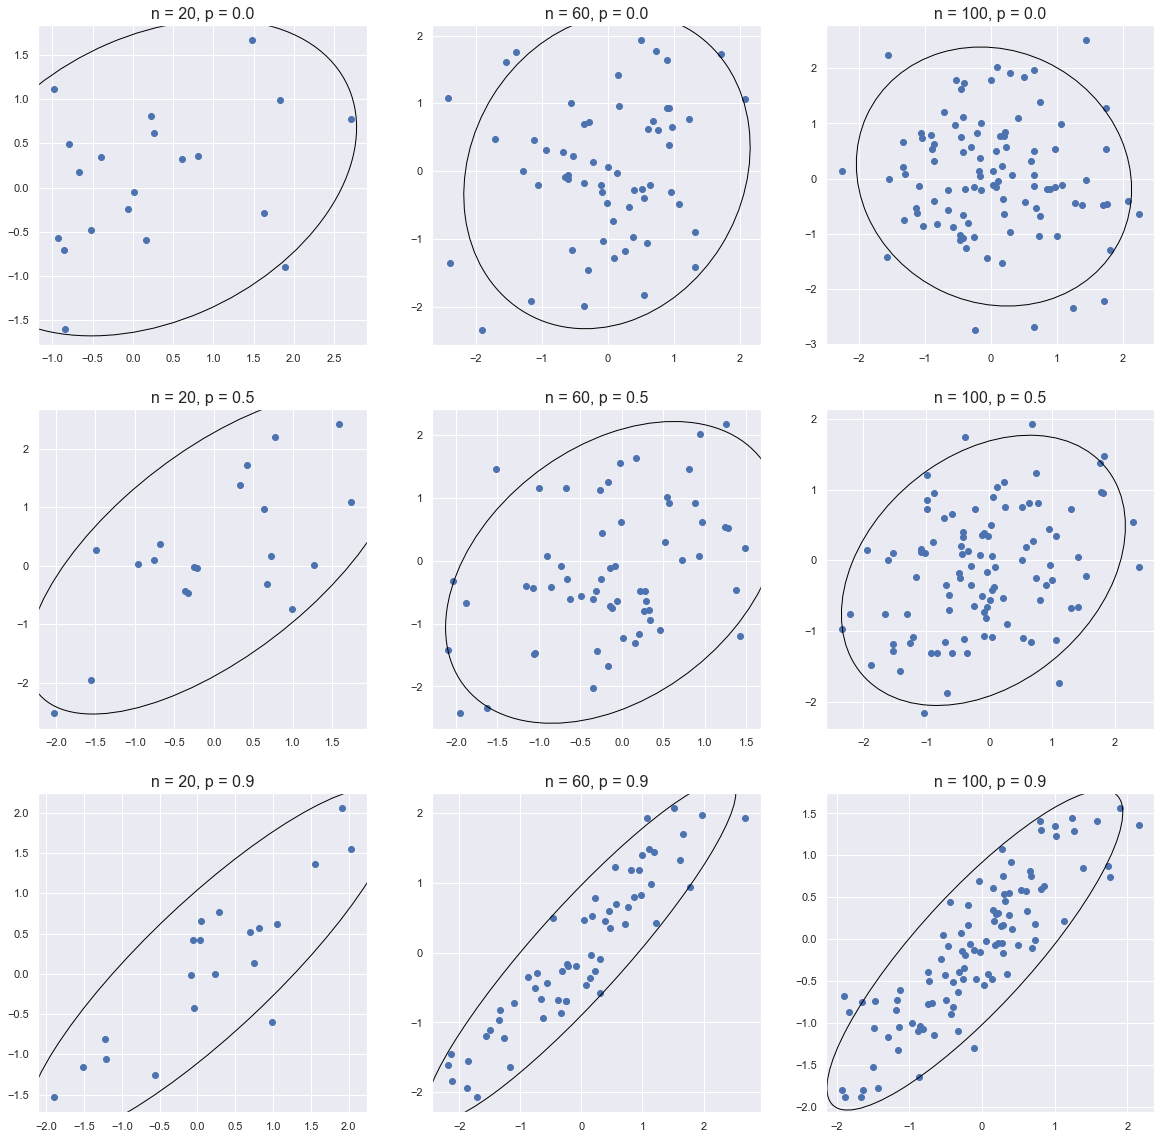

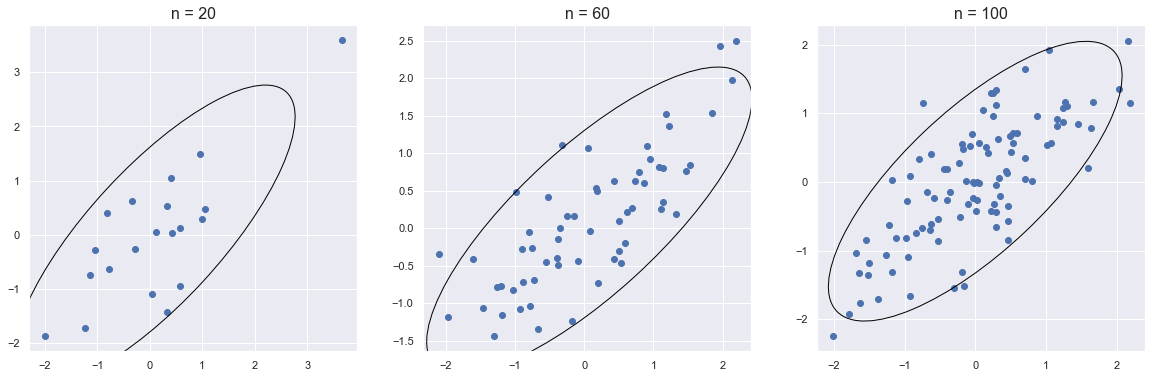

In [19]:
f = open('correlation_coeff.txt', 'w')
sys.stdout = f

np.random.seed(42)
draw("Normal", correlation, selection)
print()

draw("NormalMixed", [0.9], selection)